In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from pathlib import Path  
# 相对路径 
data_dir = Path("data") / "cwru_dataset" / "CWRU_10"
# 文件名列表
file_names = [
    '1730-0.000-Normal.mat',
    '1730-0.007-Ball.mat',
    '1730-0.007-InnerRace.mat',
    '1730-0.007-OuterRace6.mat',
    '1730-0.014-Ball.mat',
    '1730-0.014-InnerRace.mat',
    '1730-0.014-OuterRace6.mat',
    '1730-0.021-Ball.mat',
    '1730-0.021-InnerRace.mat',
    '1730-0.021-OuterRace6.mat'
]
# 读取文件
for file in file_names:
    # 完整路径
    file_path = data_dir / file
    # 读取MAT文件
    data = loadmat(file_path)
    # 打印文件中的变量名
    print(f"文件: {file}")
    print("包含的变量:", list(data.keys()))

文件: 1730-0.000-Normal.mat
包含的变量: ['__header__', '__version__', '__globals__', 'X100_DE_time', 'X100_FE_time', 'X100RPM']
文件: 1730-0.007-Ball.mat
包含的变量: ['__header__', '__version__', '__globals__', 'X121_DE_time', 'X121_FE_time', 'X121_BA_time', 'X121RPM']
文件: 1730-0.007-InnerRace.mat
包含的变量: ['__header__', '__version__', '__globals__', 'X108_DE_time', 'X108_FE_time', 'X108_BA_time', 'X108RPM']
文件: 1730-0.007-OuterRace6.mat
包含的变量: ['__header__', '__version__', '__globals__', 'X133_DE_time', 'X133_FE_time', 'X133_BA_time', 'X133RPM']
文件: 1730-0.014-Ball.mat
包含的变量: ['__header__', '__version__', '__globals__', 'X188_DE_time', 'X188_FE_time', 'X188_BA_time', 'X188RPM']
文件: 1730-0.014-InnerRace.mat
包含的变量: ['__header__', '__version__', '__globals__', 'X172_DE_time', 'X172_FE_time', 'X172_BA_time', 'X172RPM']
文件: 1730-0.014-OuterRace6.mat
包含的变量: ['__header__', '__version__', '__globals__', 'X200_DE_time', 'X200_FE_time', 'X200_BA_time', 'X200RPM']
文件: 1730-0.021-Ball.mat
包含的变量: ['__header__', '

In [11]:
from scipy import io as scio
mat_fileName = r'G:\python_code\TimesNet_AS-MAML_LSTM_test1\data\cwru_dataset\CWRU_10\1730-0.007-Ball.mat'
data = scio.loadmat(mat_fileName )  # 读出来的数据是字典dict型
data 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 13:57:52 2000',
 '__version__': '1.0',
 '__globals__': [],
 'X121_DE_time': array([[ 0.09031393],
        [ 0.22497265],
        [-0.10883154],
        ...,
        [ 0.02858858],
        [-0.15934886],
        [-0.01835517]]),
 'X121_FE_time': array([[ 0.07232   ],
        [-0.00780727],
        [ 0.12327273],
        ...,
        [-0.08834545],
        [-0.18922364],
        [-0.15861091]]),
 'X121_BA_time': array([[-0.05460214],
        [-0.05778089],
        [-0.0449854 ],
        ...,
        [ 0.02772356],
        [ 0.04108237],
        [ 0.03037923]]),
 'X121RPM': array([[1722]], dtype=uint16)}

In [12]:
import pandas as pd
from scipy.io import loadmat 
#文件名称
file_names = [
    '1730-0.000-Normal.mat',    #X100_DE_time
    '1730-0.007-Ball.mat',      #X121_DE_time
    '1730-0.007-InnerRace.mat', #X108_DE_time
    '1730-0.007-OuterRace6.mat',#X133_DE_time
    '1730-0.014-Ball.mat',      #X188_DE_time
    '1730-0.014-InnerRace.mat', #X172_DE_time
    '1730-0.014-OuterRace6.mat',#X200_DE_time
    '1730-0.021-Ball.mat',      #X225_DE_time
    '1730-0.021-InnerRace.mat', #X212_DE_time
    '1730-0.021-OuterRace6.mat' #X237_DE_time
]
#驱动端数据变量名
data_columns = [
    'X100_DE_time', 'X121_DE_time', 'X108_DE_time', 
    'X133_DE_time', 'X188_DE_time', 'X172_DE_time', 
    'X200_DE_time', 'X225_DE_time', 'X212_DE_time', 
    'X237_DE_time'
]
#DataFrame的列名
columns_name = [
    'de_normal', 
    'de_7_ball', 'de_7_inner', 'de_7_outer', 
    'de_14_ball', 'de_14_inner', 'de_14_outer', 
    'de_21_ball', 'de_21_inner', 'de_21_outer'
]
#初始化DataFrame并循环读取文件
data_12k_10c = pd.DataFrame()
for index in range(10):
    current_file_path = data_dir / file_names[index]
    # 检查文件是否存在
    if not current_file_path.exists():
        print(f"警告：文件不存在 → {current_file_path}")
        continue
    try:
        # 读取当前文件
        data = loadmat(current_file_path)
        # 检查当前变量是否在文件中
        if data_columns[index] not in data.keys():
            print(f"警告：文件 {file_names[index]} 中无变量 → {data_columns[index]}")
            print(f"该文件实际变量：{list(data.keys())}")  # 打印实际变量名
            continue
        # 提取数据并转为一维数组
        data_list = data[data_columns[index]].reshape(-1)
        # 截取前长度一致的样本
        if len(data_list) >= 119808:
            data_12k_10c[columns_name[index]] = data_list[:119808]
        else:
            print(f"警告：文件 {file_names[index]} 数据长度不足119808 → 实际长度：{len(data_list)}") 
    except Exception as e:
        print(f"处理文件 {file_names[index]} 时出错 → {str(e)}")
# 结果
print(f"\nDataFrame 形状：{data_12k_10c.shape}") 
print(f"成功读取的列：{list(data_12k_10c.columns)}")
# 保存为CSV文件
csv_save_path = data_dir / "CWRU_10.csv" 
data_12k_10c.to_csv(csv_save_path, index=False)  # index=False：不保存行号（避免冗余）

print(f"\nCSV文件已保存至：{csv_save_path}")



DataFrame 形状：(119808, 10)
成功读取的列：['de_normal', 'de_7_ball', 'de_7_inner', 'de_7_outer', 'de_14_ball', 'de_14_inner', 'de_14_outer', 'de_21_ball', 'de_21_inner', 'de_21_outer']

CSV文件已保存至：data\cwru_dataset\CWRU_10\CWRU_10.csv


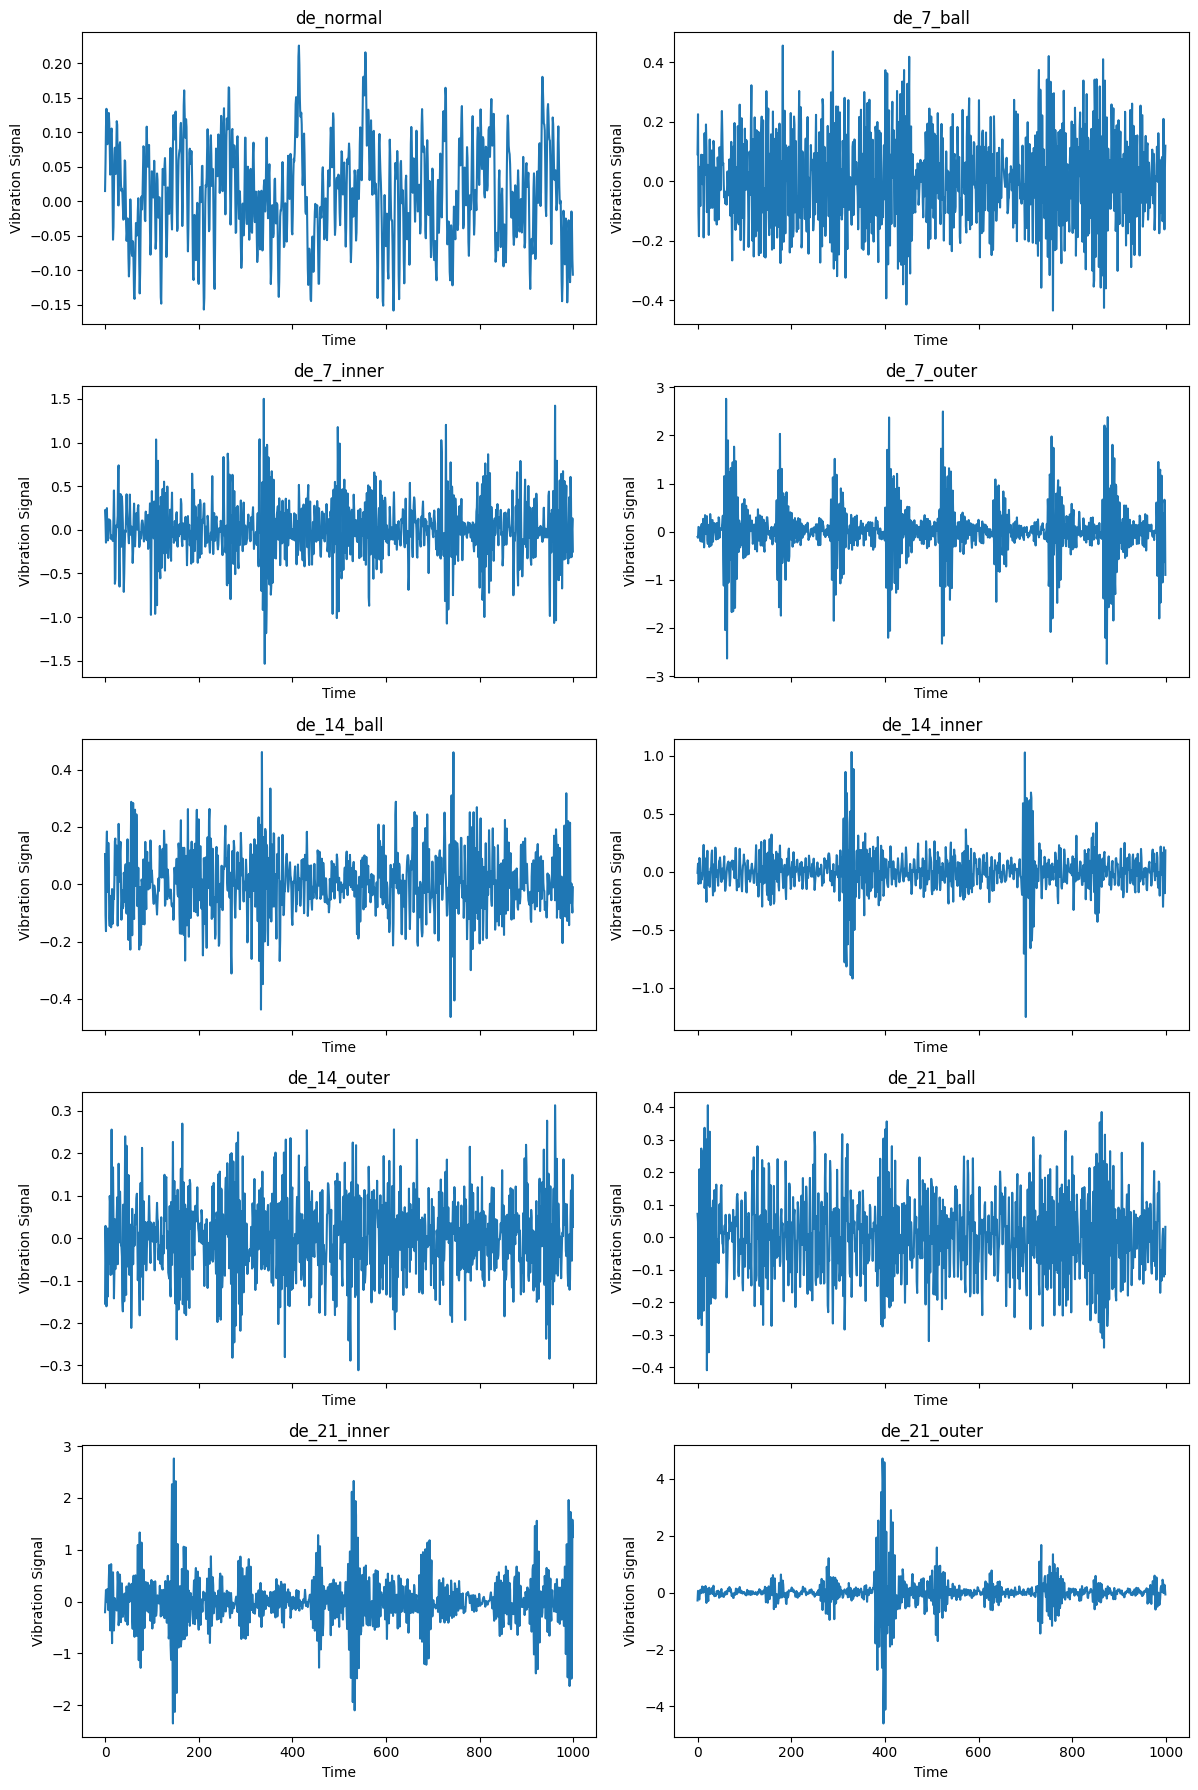

图片已保存至：data\cwru_dataset\CWRU_10\CWRU-10.png


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 读取CSV文件的前1000行
csv_file_name = "CWRU_10.csv"
csv_file_path = data_dir / csv_file_name
df = pd.read_csv(csv_file_path, nrows=1000)
# 获取列名
columns = df.columns
# 设置子图布局，并调整子图之间的间距
fig, axs = plt.subplots(5, 2, figsize=(12, 18), sharex=True)
# wspace调整子图之间的水平间距，hspace调整垂直间距
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# 将列名按顺序分配给子图
for i in range(5):
    for j in range(2):
        index = i * 2 + j
        if index < len(columns):
            axs[i, j].plot(df[columns[index]])
            axs[i, j].set_title(columns[index])
            axs[i, j].set_xlabel('Time')
            axs[i, j].set_ylabel('Vibration Signal')
# 拼接图片保存路径
image_save_path = data_dir / "CWRU-10.png"
plt.savefig(image_save_path)     
# 调整布局
plt.tight_layout()
plt.show()
print(f"图片已保存至：{image_save_path}")

In [14]:
"""
Modified: 适配10个目标CWRU文件（1730rpm，含不同故障类型/程度）
"""
# 随机选取起始位置，截取固定长度样本

from scipy.io import loadmat
import random
import numpy as np
import pandas as pd
from pathlib import Path 


# -------------------------- 1. 文件设置 --------------------------
# 数据根目录
root = Path("data")
# 数据文件路径
data_dir = root / "cwru_dataset" / "CWRU_10"
# 输出路径
save_dir = root / "cwru_dataset" / "CWRU_10"

target_files = [
    {"filename": "1730-0.000-Normal.mat",    "de_var": "X100_DE_time", "label_str": "0.000-Normal"},
    {"filename": "1730-0.007-Ball.mat",      "de_var": "X121_DE_time", "label_str": "0.007-Ball"},
    {"filename": "1730-0.007-InnerRace.mat", "de_var": "X108_DE_time", "label_str": "0.007-InnerRace"},
    {"filename": "1730-0.007-OuterRace6.mat","de_var": "X133_DE_time", "label_str": "0.007-OuterRace6"},
    {"filename": "1730-0.014-Ball.mat",      "de_var": "X188_DE_time", "label_str": "0.014-Ball"},
    {"filename": "1730-0.014-InnerRace.mat", "de_var": "X172_DE_time", "label_str": "0.014-InnerRace"},
    {"filename": "1730-0.014-OuterRace6.mat","de_var": "X200_DE_time", "label_str": "0.014-OuterRace6"},
    {"filename": "1730-0.021-Ball.mat",      "de_var": "X225_DE_time", "label_str": "0.021-Ball"},
    {"filename": "1730-0.021-InnerRace.mat", "de_var": "X212_DE_time", "label_str": "0.021-InnerRace"},
    {"filename": "1730-0.021-OuterRace6.mat","de_var": "X237_DE_time", "label_str": "0.021-OuterRace6"},
]

# 采样参数
sample_length = 500    # 每个样本的采样点数量
sample_number = 200    # 每个文件生成的总样本数
train_test_rate = 0.7  # 训练集占比（70%训练，30%测试）

# 标签映射（10类，与target_files的label_str一一对应）
label_map = {
    "0.000-Normal": 0,
    "0.007-Ball": 1,
    "0.007-InnerRace": 2,
    "0.007-OuterRace6": 3,
    "0.014-Ball": 4,
    "0.014-InnerRace": 5,
    "0.014-OuterRace6": 6,
    "0.021-Ball": 7,
    "0.021-InnerRace": 8,
    "0.021-OuterRace6": 9
}

# -------------------------- 2. 读取数据+生成样本 --------------------------
trains = None  # 初始化训练集
tests = None   # 初始化测试集

for file_info in target_files:
    # 构建文件完整路径
    file_path = data_dir / file_info["filename"]
    # 检查文件是否存在
    if not file_path.exists():
        print(f"文件不存在 → {file_path}")
        continue
    try:
        # 读取.mat文件
        mat_data = loadmat(file_path)
        # 提取驱动端数据
        de_var = file_info["de_var"]
        if de_var not in mat_data.keys():
            print(f"变量不存在：{de_var}，文件实际变量：{list(mat_data.keys())}")
            continue
        de_time = mat_data[de_var].reshape(-1)  # 直接转为一维数组
        print(f" 驱动端数据长度：{len(de_time)}")
        
        # 3. 截取前120000个采样点
        de_time = de_time[:120000]
        valid_length = len(de_time)
        if valid_length < sample_length:
            print(f" 数据过短：有效长度{valid_length} < 样本长度{sample_length}")
            continue
        
        # 4. 【修复采样逻辑】随机生成起始位置
        # 起始位置范围：[0, valid_length - sample_length]，确保截取不越界
        max_begin = valid_length - sample_length
        if max_begin <= 0:
            print(f"无法采样：有效长度{valid_length} < 样本长度{sample_length}")
            continue
        # 随机选取sample_number个不重复的起始位置
        begins = random.sample(range(0, max_begin + 1), sample_number)
        
        # 5. 生成样本（标签+振动序列）
        records = []
        for begin in begins:
            # 截取从begin开始的sample_length个采样点
            sample = de_time[begin:begin + sample_length].tolist()
            # 拼接标签和样本数据
            record = [label_map[file_info["label_str"]]] + sample
            records.append(record)
        
        # 6. 划分训练集和测试集
        temp = np.array(records)
        # 计算训练集数量（70%）
        train_count = int(sample_number * train_test_rate)
        # 随机打乱并划分
        indices = np.random.permutation(sample_number)
        train_idx, test_idx = indices[:train_count], indices[train_count:]
        train_data, test_data = temp[train_idx], temp[test_idx]
        
        # 7. 拼接所有文件的训练/测试集
        if trains is None:
            trains = train_data
            tests = test_data
        else:
            trains = np.r_[trains, train_data]
            tests = np.r_[tests, test_data]
        
        print(f"生成样本数：{len(records)}（训练{len(train_data)}，测试{len(test_data)}）")
    
    except Exception as e:
        print(f"处理文件{file_info['filename']}出错：{str(e)}")

# -------------------------- 3. 保存训练/测试集 --------------------------
if trains is not None and tests is not None:
    # 保存训练集
    train_df = pd.DataFrame(trains)
    train_df[0] = train_df[0].astype(int)  # 标签转为整数
    train_path = save_dir / "TRAIN.tsv"
    train_df.to_csv(train_path, header=False, sep="\t", index=False)
    print(f"\n训练集保存：{train_path}，形状：{trains.shape}")
    
    # 保存测试集
    test_df = pd.DataFrame(tests)
    test_df[0] = test_df[0].astype(int)  # 标签转为整数
    test_path = save_dir / "TEST.tsv"
    test_df.to_csv(test_path, header=False, sep="\t", index=False)
    print(f"测试集保存：{test_path}，形状：{tests.shape}")
else:
    print(f"\n未生成数据：所有文件处理失败或无有效数据")

 驱动端数据长度：485643
生成样本数：200（训练140，测试60）
 驱动端数据长度：121556
生成样本数：200（训练140，测试60）
 驱动端数据长度：122917
生成样本数：200（训练140，测试60）
 驱动端数据长度：122571
生成样本数：200（训练140，测试60）
 驱动端数据长度：122136
生成样本数：200（训练140，测试60）
 驱动端数据长度：121701
生成样本数：200（训练140，测试60）
 驱动端数据长度：121991
生成样本数：200（训练140，测试60）
 驱动端数据长度：122136
生成样本数：200（训练140，测试60）
 驱动端数据长度：121991
生成样本数：200（训练140，测试60）
 驱动端数据长度：121991
生成样本数：200（训练140，测试60）

训练集保存：data\cwru_dataset\CWRU_10\TRAIN.tsv，形状：(1400, 501)
测试集保存：data\cwru_dataset\CWRU_10\TEST.tsv，形状：(600, 501)
